In [1]:
from pyConAVL import ConAVL
from pyAVL import AVL
import random
import threading

In [2]:
TXN_G = 0 # get (TXN_G, KEY)
TXN_P = 1 # put (TXN_P, KEY, VAL)
TXN_R = 2 # remove (TXN_R, KEY)
def run_txn(dtree, dseq):
    """
    run a operation sequence on specific avl tree
    sequence should be in a list of tuples [(),()]
    """
    results = []
    for p in dseq:
        if p[0]==TXN_G:
            results.append(dtree.get(p[1]))
            continue
        if p[0]==TXN_P:
            results.append(dtree.put(p[1], p[2]))
            continue
        if p[0]==TXN_R:
            results.append(dtree.remove(p[1]))
            continue
    return results

In [3]:
random_list = random.sample(list(range(50)),k=50)

### Concurrent All Insertion Transactions
#### - conAVL succeeds
#### - seqAVL fails

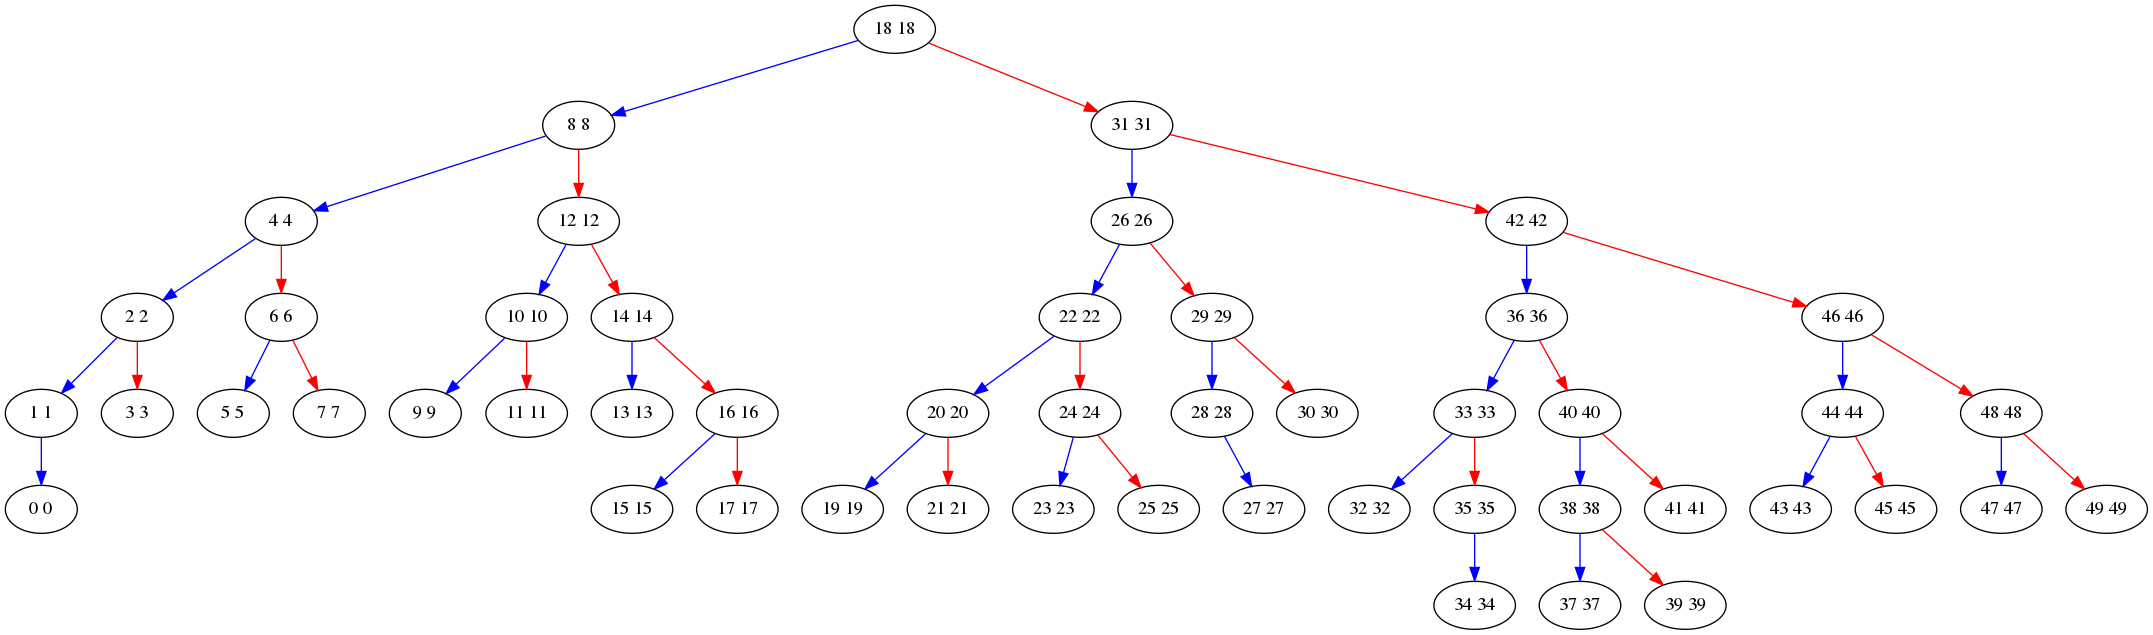

In [6]:
conTree1 = ConAVL(simulate=True)
conSeqs1 = [[(TXN_P, i, i) for i in random_list[j*10:(j+1)*10]] for j in range(5)]
conTxns1 = [threading.Thread(target=run_txn, args=(conTree1, conSeqs1[i])) for i in range(5)]
for i in range(5):
    conTxns1[i].start()
for i in range(5):
    conTxns1[i].join()
conTree1.print()

In [7]:
seqTree1 = AVL(simulate=True)
seqSeqs1 = [[(TXN_P, i, i) for i in random_list[j*10:(j+1)*10]] for j in range(5)]
seqTxns1 = [threading.Thread(target=run_txn, args=(seqTree1, seqSeqs1[i])) for i in range(5)]
for i in range(5):
    seqTxns1[i].start()
for i in range(5):
    seqTxns1[i].join()
seqTree1.print()

Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/xiyou/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/xiyou/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-4664192b4634>", line 15, in run_txn
    results.append(dtree.put(p[1], p[2]))
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 21, in put
    self.__rebalance()
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 42, in __rebalance
    self.root = self.__getRoot(self.__autoRotate(unbalanced))
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 389, in __autoRotate
    return self.__rotateLR(dnode)
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurrentAVL/pyAVL.py", line 304, in __rotateLR
    self.__rotateRR(k1)
  File "/scratch/home/xiyou/justin/pyConcurrentAVL/pyConcurr

TypeError: must be str, not int